# Рубежный контроль 1
## Чинаев Алексей РТ5-61Б Вариант 20

Для заданного набора данных произведите масштабирование данных (для одного признака) 
и преобразование категориальных признаков в количественные
двумя способами (label encoding, one hot encoding) для одного признака.

In [13]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("./heart.csv")
print("Исходные данные:")
print(data.head())


Исходные данные:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [14]:
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование столбца "trestbps"
data['trestbps_scaled'] = scaler.fit_transform(data[['trestbps']])
print("\nМасштабированные данные:")
print(data[['trestbps', 'trestbps_scaled']].head())




Масштабированные данные:
   trestbps  trestbps_scaled
0       125        -0.377636
1       140         0.479107
2       145         0.764688
3       148         0.936037
4       138         0.364875


Создадим искусственный категориальный признак.
Можно разделить числовой признак на несколько интервалов и присвоить каждому интервалу категорию. 

Для примера разобьем возраст на три интервала столбец "age":

18-35 лет: категория "молодой"
36-55 лет: категория "средний возраст"
56 и более лет: категория "пожилой"

In [15]:
import numpy as np

# Создание нового числового признака 
data['age_group'] = pd.cut(data['age'], bins=[0, 35, 55, np.inf], labels=['молодой', 'средний возраст', 'пожилой'])
print("\nРезультат создания категориального признака:")
print(data[['age', 'age_group']].head())


Результат создания категориального признака:
   age        age_group
0   52  средний возраст
1   53  средний возраст
2   70          пожилой
3   61          пожилой
4   62          пожилой


In [16]:
from sklearn.preprocessing import LabelEncoder

# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Преобразование признака "age_group" с использованием Label Encoding
data['age_group_label_encoded'] = label_encoder.fit_transform(data['age_group'])

print("\nРезультат Label Encoding:")
print(data[['age_group', 'age_group_label_encoded']].head())



Результат Label Encoding:
         age_group  age_group_label_encoded
0  средний возраст                        2
1  средний возраст                        2
2          пожилой                        1
3          пожилой                        1
4          пожилой                        1


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Создание объекта OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Преобразование признака "age_group" с использованием One-Hot Encoding
age_group_encoded = one_hot_encoder.fit_transform(data[['age_group']])

# Преобразование разреженной матрицы в массив и добавление к исходным данным
age_group_encoded_df = pd.DataFrame(age_group_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['age_group']))
data = pd.concat([data, age_group_encoded_df], axis=1)

print("\nРезультат One-Hot Encoding:")
print(data.head())



Результат One-Hot Encoding:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  trestbps_scaled        age_group  \
0   2     3       0        -0.377636  средний возраст   
1   0     3       0         0.479107  средний возраст   
2   0     3       0         0.764688          пожилой   
3   1     3       0         0.936037          пожилой   
4   3     2       0         0.364875          пожилой   

   age_group_label_encoded  age_group_молодой  age_group_пожилой  \
0                        2                0.0                0.0   
1    

Какие методы Вы использовали для решения задачи и почему?
1. StandardScaler для масштабирования признака "trestbps"

2. pd.cut для создания категориального признака "age_group":
Этот метод был выбран для разделения числового признака "age" на категории "молодой", "средний возраст" и "пожилой" на основе заданных интервалов. 

3. LabelEncoder для преобразования категориального признака "age_group" в числовой формат:

4. OneHotEncoder для преобразования категориального признака "age_group" в бинарные признаки (One-Hot Encoding):


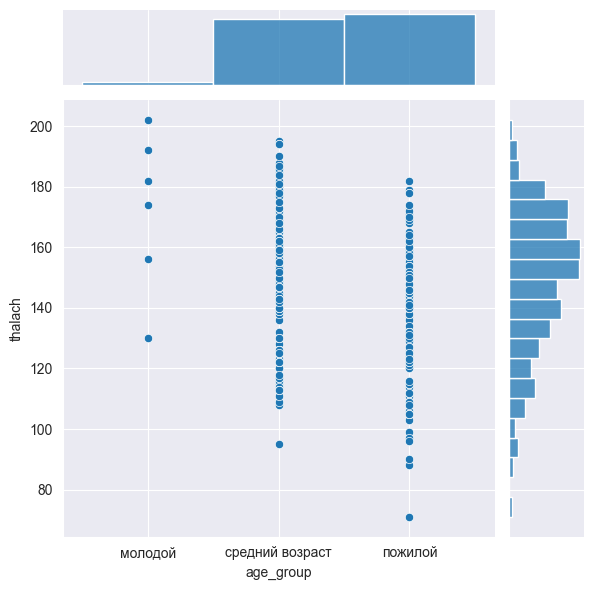

In [18]:
import seaborn as sns

# Выбор колонок для построения диаграммы рассеяния
x = data['age']
y = data['thalach']
target = data['target']

# Определение цветовых меток в зависимости от значения целевой переменной
colors = ['red' if t == 1 else 'blue' for t in target]

sns.jointplot(x=data['age_group'], y=data['thalach'])